In [1]:
import pandas as pd
import sklearn
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from datetime import datetime
import pickle
import matplotlib.pyplot as plt


In [2]:
#Creating a data frame for annual global population
world_pop=pd.read_csv('population-figures-by-country-csv_csv.csv')
pops={}
world_pop.drop(columns=['Country','Country_Code'],inplace=True)
for year in  (world_pop):
    
    for i in world_pop[year]:
        pops[year]=world_pop[year].sum()
    


world_population=pd.DataFrame(pops,index=['Population'])
world_population=world_population.transpose()

y=1960
for i in world_population.index:
    world_population.rename(index={i:str(y)},inplace=True)
    y+=1
    


In [3]:
world_population['Year']=world_population.index
world_population.set_index('Year',inplace=True)


In [4]:
#Creating a data frame for annual sea levels
sea_levels=pd.read_csv('csiro_recons_gmsl_yr_2015_csv.csv')
sea_levels=sea_levels.rename(columns={'Time':'Year'})
sea_levels.set_index('Year',inplace=True)
sea_levels.drop(columns=['GMSL uncertainty'],inplace=True)
for i,j in enumerate (sea_levels.index):
    head,mid,tail=j.partition('-')
    sea_levels.rename(index={sea_levels.index[i]:head},inplace=True)
    

    

In [5]:
#Creating a better data frame for global annual temprature annomalies
df=pd.read_csv('GLB.Ts+dSST.csv')

df=df.drop(columns='Land-Ocean: Global Means')
df=df.reset_index()
df.drop(columns=['level_17','level_16','level_15','level_14','level_13'],inplace=True)
df.set_index('level_0',inplace=True)
df=df.sort_values(by='level_0',ascending =False).head(62)
df.drop(index=['2020','2019','2018','2017','2016','2015','2014','Year'],inplace=True)
df=df.sort_values(by='level_0')
df.rename(columns={'level_1':'Jan','level_2':'Feb'},inplace=True)
df=df.astype(float)
avg=[]
for i in df.index:
    avg.append(df.loc[i].mean())
time=df.index
ndf=pd.DataFrame({'Year':time,'Avg temprature':avg}).set_index('Year')

In [6]:
#Creating a data frame for global annual carbon dioxide levels in parts per milliion (PPM)

co2=pd.read_csv('co2-annmean-mlo_csv.csv')
co2=co2.drop(columns=['Uncertainty'])
co2=co2.rename(columns={'Mean':'CO2 PPM'})
co2.set_index('Year',inplace=True)
for i,j in enumerate (co2.index):
    head,mid,tail=j.partition('-')
    co2.rename(index={co2.index[i]:head},inplace=True)


In [7]:
#Creating a data frame for global annual temprature annomalies
# temp=pd.read_csv('data.csv')

# temp.drop(axis=[0,1,2,3],index=[0,1,2,3],inplace=True)
# temp.rename(columns={'Global Land and Ocean Temperature Anomalies':'Year'},inplace=True)
# temp.rename(columns={' October':'Temp anomalie'},inplace=True)
# temp.set_index('Year',inplace=True)
# temp['Temp anomalie']=pd.to_numeric(temp['Temp anomalie'])
# temp


In [8]:
#Here I am building the Machine learning model and saving the model with the highest accuracy
X=pd.merge(co2,ndf,right_index=True,on='Year')
X=pd.merge(X,world_population,right_index=True,on='Year')
X=X.reset_index()
X=X.set_index('Year')
Y=sea_levels.reset_index()
Y=Y.sort_values(by='Year',ascending=False).head(54).sort_values(by='Year',ascending=True).reset_index().drop(columns='index')
Y=Y.set_index('Year')
accuracy=0
for i in range(100):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)
    model=LinearRegression()
    model.fit(X_train,Y_train)
    acc=model.score(X_test,Y_test)
    if acc>accuracy:
        with open('sea level predicter.pickle','wb')as f:
            pickle.dump(model,f)
        accuracy=acc
        




In [9]:
#In order to make a prediction using this model, it is needed to give it information in this order: Co2 PPM, Temp anomalie,World population

y2016=np.array([ 317.0,  -0.2,  3.08e+10])
y2016=np.reshape(y2016,(-1,3))
p=model.predict(y2016)


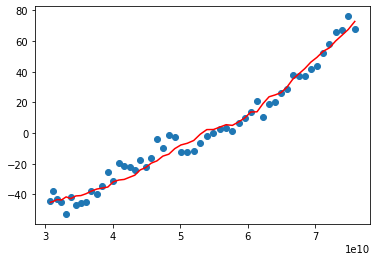

In [10]:
#In these next two examples you can see the yearly advance of sea levels as assessed by the machine learning model
Y_pred=model.predict(X)
plt.scatter(X['Population'],Y)
plt.plot(X['Population'],Y_pred,color='red')
plt.show()

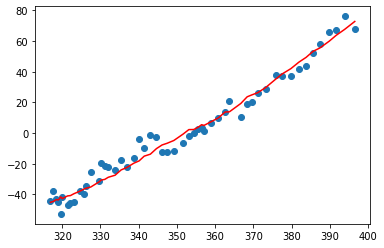

In [11]:
plt.scatter(X['CO2 PPM'],Y)
plt.plot(X['CO2 PPM'],Y_pred,color='red')
plt.show()